In [83]:
import pandas as pd
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap
from tqdm import tqdm

In [2]:
# 10 dims
models_dirs = {'beta_vae_1': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/2023-12-11/14-10-52/analysis/embeddings_dHCP.csv',
               'beta_vae_2': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/2023-12-18/13-54-42/analysis/embeddings_dHCP.csv',
               'beta_vae_3': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/2023-12-18/16-56-49/analysis/embeddings_dHCP.csv',
               'simclr_1': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/full_embeddings.csv',
               'simclr_2': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/full_embeddings.csv',
               'simclr_3': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/full_embeddings.csv',
               'simclr_4': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/full_embeddings.csv',
               'simclr_5': '/neurospin/dico/jlaval/Runs/01_deep_supervised/Program/Output/2023-06-15/14-36-49/STs_dHCP_374_subjects_embeddings/full_embeddings.csv'}

#df_dHCP = pd.read_csv(model_dir+'/dHCP_embeddings.csv')

In [3]:
# SimCLR cingulate
# beware: for now, learning rate, batch size and input size are not fixed!!
models_dirs = {f'foldlabel_bs32_{k}': f'/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-30/16-44-58_{k}/ACC_embeddings/full_embeddings.csv'
               for k in range(0, 6)}
models_dirs_lr = {f'foldlabel_bs16_lr_{k}': f'/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-26/16-54-45_{k}/ACC_embeddings/full_embeddings.csv'
                  for k in range(0,26)}
models_dirs_trimdepth = {f'trimdepth_bs16': '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-31/13-09-40_156/ACC_embeddings/full_embeddings.csv'}

models_dirs.update(models_dirs_lr)
models_dirs.update(models_dirs_trimdepth)

In [4]:
# foldlabel / cutout cingulate
# already many configs tested, still need for bug correction on bottoms (affecting keep bottom)
embeddings = '/ACC_1_embeddings/full_embeddings.csv'
models_dirs = {}
for dir_models in ['/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_only/',
                   '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel/',
                   '/volatile/jl277509/Runs/02_STS_babies/Program/Output/cutout/',
                   '/volatile/jl277509/Runs/02_STS_babies/Program/Output/trimdepth/']:
    l = sorted(os.listdir(dir_models))
    for elem in l:
        models_dirs[elem]=dir_models+elem+embeddings

In [5]:
models_dirs = {}
embeddings = '/ACC_1_embeddings/full_embeddings.csv'
dir_models = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/random/'
l = sorted(os.listdir(dir_models))
for elem in l:
    models_dirs[elem]=dir_models+elem+embeddings

In [6]:
## 12 layer convnet OFC
ndims=256
models_dirs = {}
embeddings = '/troiani_custom_embeddings/custom_cross_val_embeddings.csv'
dir_models_list = ['/volatile/jl277509/Runs/02_STS_babies/Program/Output/ORBITAL_12-layer_k7/',
                   '/volatile/jl277509/Runs/02_STS_babies/Program/Output/ORBITAL_12-layer_k3/']
for dir_models in dir_models_list:
    l = sorted(os.listdir(dir_models))
    for elem in l:
        models_dirs[elem]=dir_models+elem+embeddings

# Processing

In [30]:
# load embeddings
for model, directory in models_dirs.items():
    embeddings = pd.read_csv(directory)
    models_dirs[model]=embeddings

In [31]:
# peut-être vaudrait-il mieux travailler avec la mutual information. Et utiliser les représentations d'UKB ? Mais comment traduire la distribution en probabilité ? Et comment traduire une "loi jointe ?"

In [32]:
scaler = StandardScaler() # ne change pas le score de régression

In [33]:
models_embeddings = models_dirs.copy()
dims = [f'dim{k}' for k in range(1, ndims+1)]
for name, model in models_embeddings.items():
    model = model[dims].to_numpy()
    #model = scaler.fit_transform(model)
    models_embeddings[name] = model

# use linear regression

In [16]:
correl_matrix = np.zeros((len(models_dirs), len(models_dirs)))
for i, (name1, model1) in enumerate(models_embeddings.items()):
    for j, (name2, model2) in enumerate(models_embeddings.items()):
        reg = LinearRegression().fit(model1, model2)
        sc = reg.score(model1, model2)
        #print(f'{name1} {name2}: {sc}')
        correl_matrix[i,j]=sc

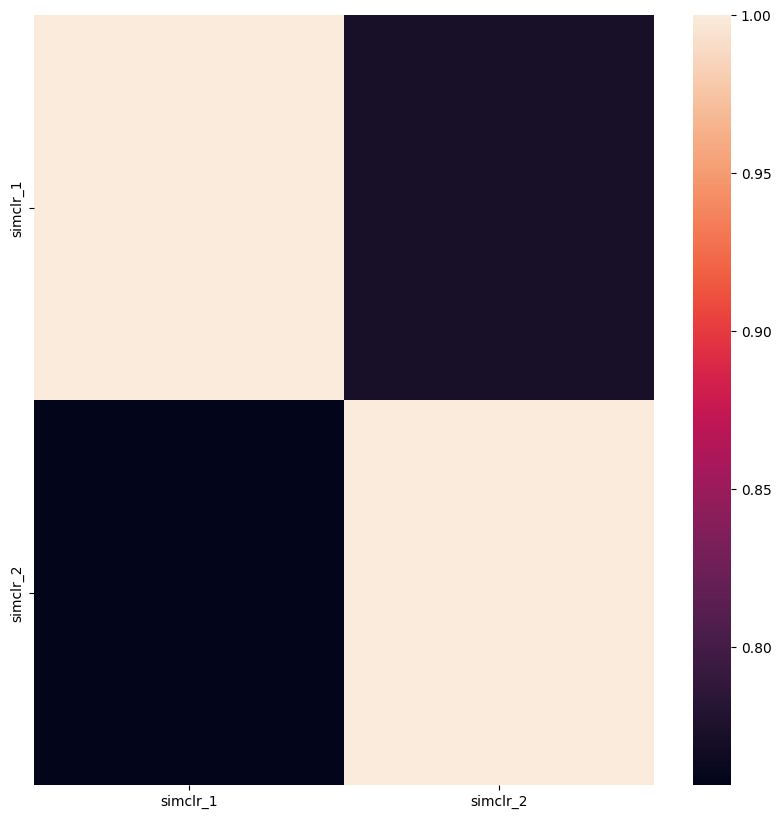

In [17]:
ticklabels = models_dirs.keys()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correl_matrix, annot=False, xticklabels=ticklabels, yticklabels=ticklabels,ax=ax)
plt.show()

In [18]:
convolved

NameError: name 'convolved' is not defined

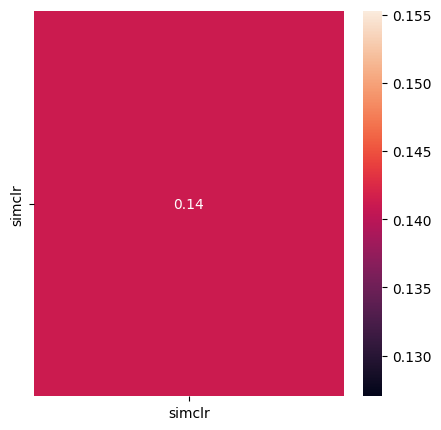

In [19]:
# convolve heatmap with step 5
# BEWARE: NEED 5 MODELS PER CONFIG. CURRENTLY LAST ONE HAS 4, WHICH REDUCES THE OBTAINED VALUE.
step=5
ticklabels = models_dirs.keys()
fig,ax=plt.subplots(figsize=(5,5))
convolved = scipy.signal.convolve2d(correl_matrix, np.ones((5,5)))[4::5,4::5] / 25
labels = list(ticklabels)[::step]
labels = [elem[:-2] for elem in labels]
sns.heatmap(convolved, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
plt.show()

# Use disimilarity matrix (pairwise euclidean distance)
Beware: the metric is asymmetric, maybe average ?
Use euclidean or cosine distance ? euclidean for betavae and cosine for simclr ?

In [14]:
# compute pairwise euclidean distance between all subjects and select a restricted neighborhood
proportion = 0.2
nb_subjects = models_embeddings[list(models_embeddings.keys())[0]].shape[0]
nb_neigh = int(nb_subjects * proportion)
nb_models = len(models_embeddings.keys())
tau_mat, p_value_mat = np.zeros((nb_models, nb_models)), np.zeros((nb_models, nb_models))

for i, (name1, model1) in enumerate(models_embeddings.items()):
    for j, (name2, model2) in enumerate(models_embeddings.items()):

        selected_dists_1 = []
        selected_dists_2 = []
        pairwise_dists_1 = euclidean_distances(model1)
        #pairwise_dists_1 = cosine_similarity(model1)
        pairwise_dists_2 = euclidean_distances(model2)
        #pairwise_dists_2 = cosine_similarity(model2)
        for idx, (dists_1, dists_2) in enumerate(zip(pairwise_dists_1, pairwise_dists_2)):
            dists_1 = np.delete(dists_1, idx) #remove distance to itself
            dists_2 = np.delete(dists_2, idx)
            idxs=np.argsort(dists_1) #get closest subjects for model1
            selected_dists_1=selected_dists_1+dists_1[idxs[:nb_neigh]].tolist()
            selected_dists_2=selected_dists_2+dists_2[idxs[:nb_neigh]].tolist() #apply same subject selection to model2
        tau, p = scipy.stats.kendalltau(selected_dists_1, selected_dists_2)
        tau_mat[i,j]=tau
        p_value_mat[i,j]=p

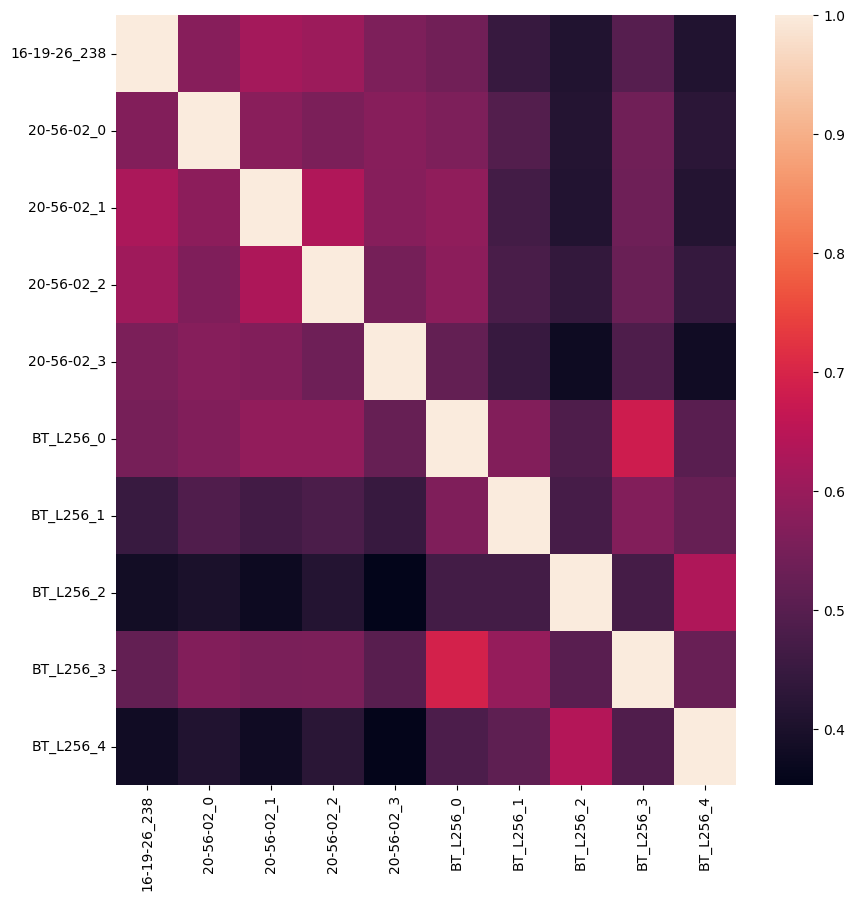

In [15]:
ticklabels = models_dirs.keys()
#fig, axs = plt.subplots(figsize=(12, 6), ncols=2)
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(tau_mat, annot=False, xticklabels=ticklabels, yticklabels=ticklabels,ax=ax)
#sns.heatmap(p_value_mat, annot=True, xticklabels=ticklabels, yticklabels=ticklabels, ax=axs[1])
plt.show()

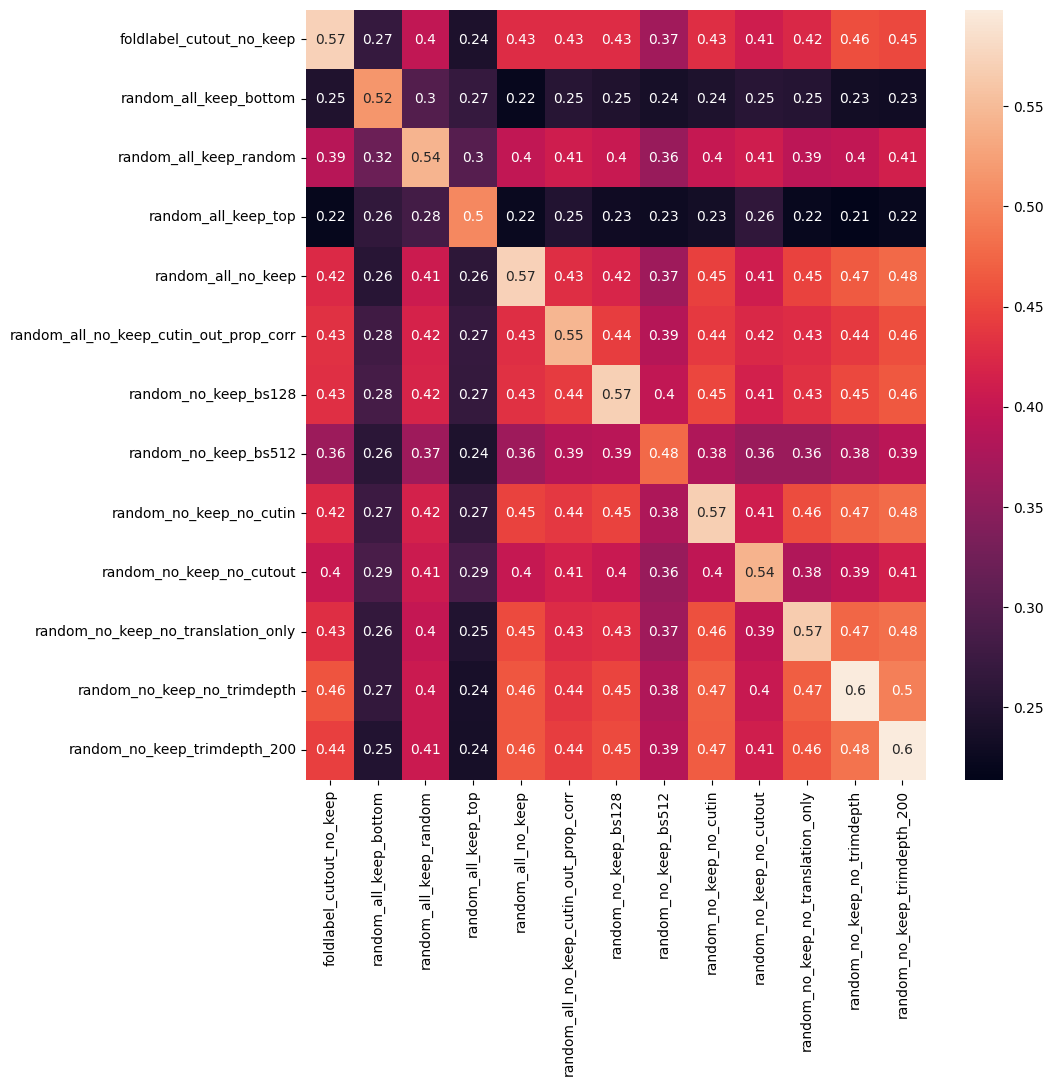

In [14]:
# convolve heatmap with step 5
# BEWARE: NEED 5 MODELS PER CONFIG. CURRENTLY LAST ONE HAS 4, WHICH REDUCES THE OBTAINED VALUE.
step=5
ticklabels = models_dirs.keys()
fig,ax=plt.subplots(figsize=(10,10))
convolved = scipy.signal.convolve2d(tau_mat, np.ones((5,5)))[4::5,4::5] / 25
labels = list(ticklabels)[::step]
labels = [elem[:-2] for elem in labels]
sns.heatmap(convolved, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
plt.show()

In [34]:
pairwise_dists_1

array([[1.        , 0.80704092, 0.87306826, ..., 0.67543663, 0.5005344 ,
        0.6747323 ],
       [0.80704092, 1.        , 0.84124211, ..., 0.87137303, 0.62139335,
        0.76880212],
       [0.87306826, 0.84124211, 1.        , ..., 0.75202918, 0.66694808,
        0.59420683],
       ...,
       [0.67543663, 0.87137303, 0.75202918, ..., 1.        , 0.4968957 ,
        0.84798499],
       [0.5005344 , 0.62139335, 0.66694808, ..., 0.4968957 , 1.        ,
        0.38506947],
       [0.6747323 , 0.76880212, 0.59420683, ..., 0.84798499, 0.38506947,
        1.        ]])

# Number of common nearest neighbours

In [195]:
## two models

# orbital
models_dirs = {'orbital_1': '/neurospin/dico/jlaval/Output/orbital_extremities_pepper/18-50-28_0/UKB_random_embeddings/train_val_embeddings.csv',
               'orbital_2': '/neurospin/dico/jlaval/Output/orbital_extremities_pepper/18-50-28_1/UKB_random_embeddings/train_val_embeddings.csv',
               'orbital_3': '/neurospin/dico/jlaval/Output/orbital_extremities_pepper/18-50-28_2/UKB_random_embeddings/train_val_embeddings.csv'
               }

# cingulate
"""
models_dirs = {'cingulate_1': '/neurospin/dico/jlaval/Output/cingulate_extremities_pepper/22-40-56_0/UKB_random_embeddings/train_val_embeddings.csv',
               'cingulate_2': '/neurospin/dico/jlaval/Output/cingulate_extremities_pepper/22-40-56_1/UKB_random_embeddings/train_val_embeddings.csv',
               'cingulate_3': '/neurospin/dico/jlaval/Output/cingulate_extremities_pepper/22-40-56_2/UKB_random_embeddings/train_val_embeddings.csv'
}
"""

# FIP LR

models_dirs = {'FIP_1': '/neurospin/dico/jlaval/Output/FIP_LR/18-19-19_0/ukb_right_random_embeddings/train_val_embeddings.csv', # 84%
               'FIP_2': '/neurospin/dico/jlaval/Output/FIP_LR/18-19-19_1/ukb_right_random_embeddings/train_val_embeddings.csv', # 77%
               'FIP_3': '/neurospin/dico/jlaval/Output/FIP_LR/18-19-19_3/ukb_right_random_embeddings/train_val_embeddings.csv'  #77%

}


#FIP_LR_20_60
"""
models_dirs = {'FIP_1': '/neurospin/dico/jlaval/Output/FIP_LR_cutout20_cutin60/11-04-00_0/ukb_right_random_embeddings/train_val_embeddings.csv', # this one didn't converge well
               'FIP_2': '/neurospin/dico/jlaval/Output/FIP_LR_cutout20_cutin60/11-04-00_1/ukb_right_random_embeddings/train_val_embeddings.csv', # 82%+
               'FIP_3': '/neurospin/dico/jlaval/Output/FIP_LR_cutout20_cutin60/11-04-00_2/ukb_right_random_embeddings/train_val_embeddings.csv' #82%+
}
"""

#FIP_right only ! (Champollion V0)
"""
models_dirs = {'FIP_1': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_2': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_1/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_3': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_2/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_4': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_3/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_5': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_embeddings/train_val_embeddings.csv'
               
}
"""
# FIP_left
"""
models_dirs = {'FIP_1': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_0/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_2': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_1/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_3': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_2/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_4': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_3/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_5': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_4/ukb_random_embeddings/train_val_embeddings.csv',
}
"""
ndims=256

In [196]:
# load embeddings
models_embeddings = {}
for model, directory in models_dirs.items():
    embeddings = pd.read_csv(directory)
    models_embeddings[model]=embeddings
dims = [f'dim{k}' for k in range(1,ndims+1)]

In [197]:
# compute pairwise cosine distance between all subjects and select a restricted neighborhood
nb_subjects = models_embeddings[list(models_embeddings.keys())[0]].shape[0]
nb_models = len(models_embeddings.keys())

In [198]:
df_pairwise = {} ## PB de mémoire ici ???
for name, model in models_embeddings.items():
    subjects = model['ID'].to_list()
    pairwise_dists = 1-cosine_similarity(model[dims].to_numpy())
    pairwise_dists = pd.DataFrame(pairwise_dists, columns=subjects, index=subjects)
    df_pairwise[name]=pairwise_dists

In [199]:
nb_neigh = 100
names=df_pairwise.keys()
intersections = pd.DataFrame(np.full(shape=(len(names), len(names)), fill_value=nb_neigh), index=names, columns=names, dtype=object)

for i, (name1, pairwise_dists_1) in enumerate(df_pairwise.items()):
    for j, (name2, pairwise_dists_2) in enumerate(df_pairwise.items()):
        intersection_list = []
        if j>=i:
            pass
        else:
            for subject in tqdm(subjects[:1000]):
                ## for each column, sort the rows and get 30 subject names
                nearest_1 = pairwise_dists_1[subject].sort_values().index.tolist()[1:nb_neigh+1]
                nearest_2 = pairwise_dists_2[subject].sort_values().index.tolist()[1:nb_neigh+1]
                intersection = len(set(nearest_1).intersection(nearest_2))
                intersection_list.append(intersection)
            intersections.loc[name1,name2]=intersection_list
            intersections.loc[name2,name1]=intersection_list

100%|██████████| 1000/1000 [00:03<00:00, 271.94it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


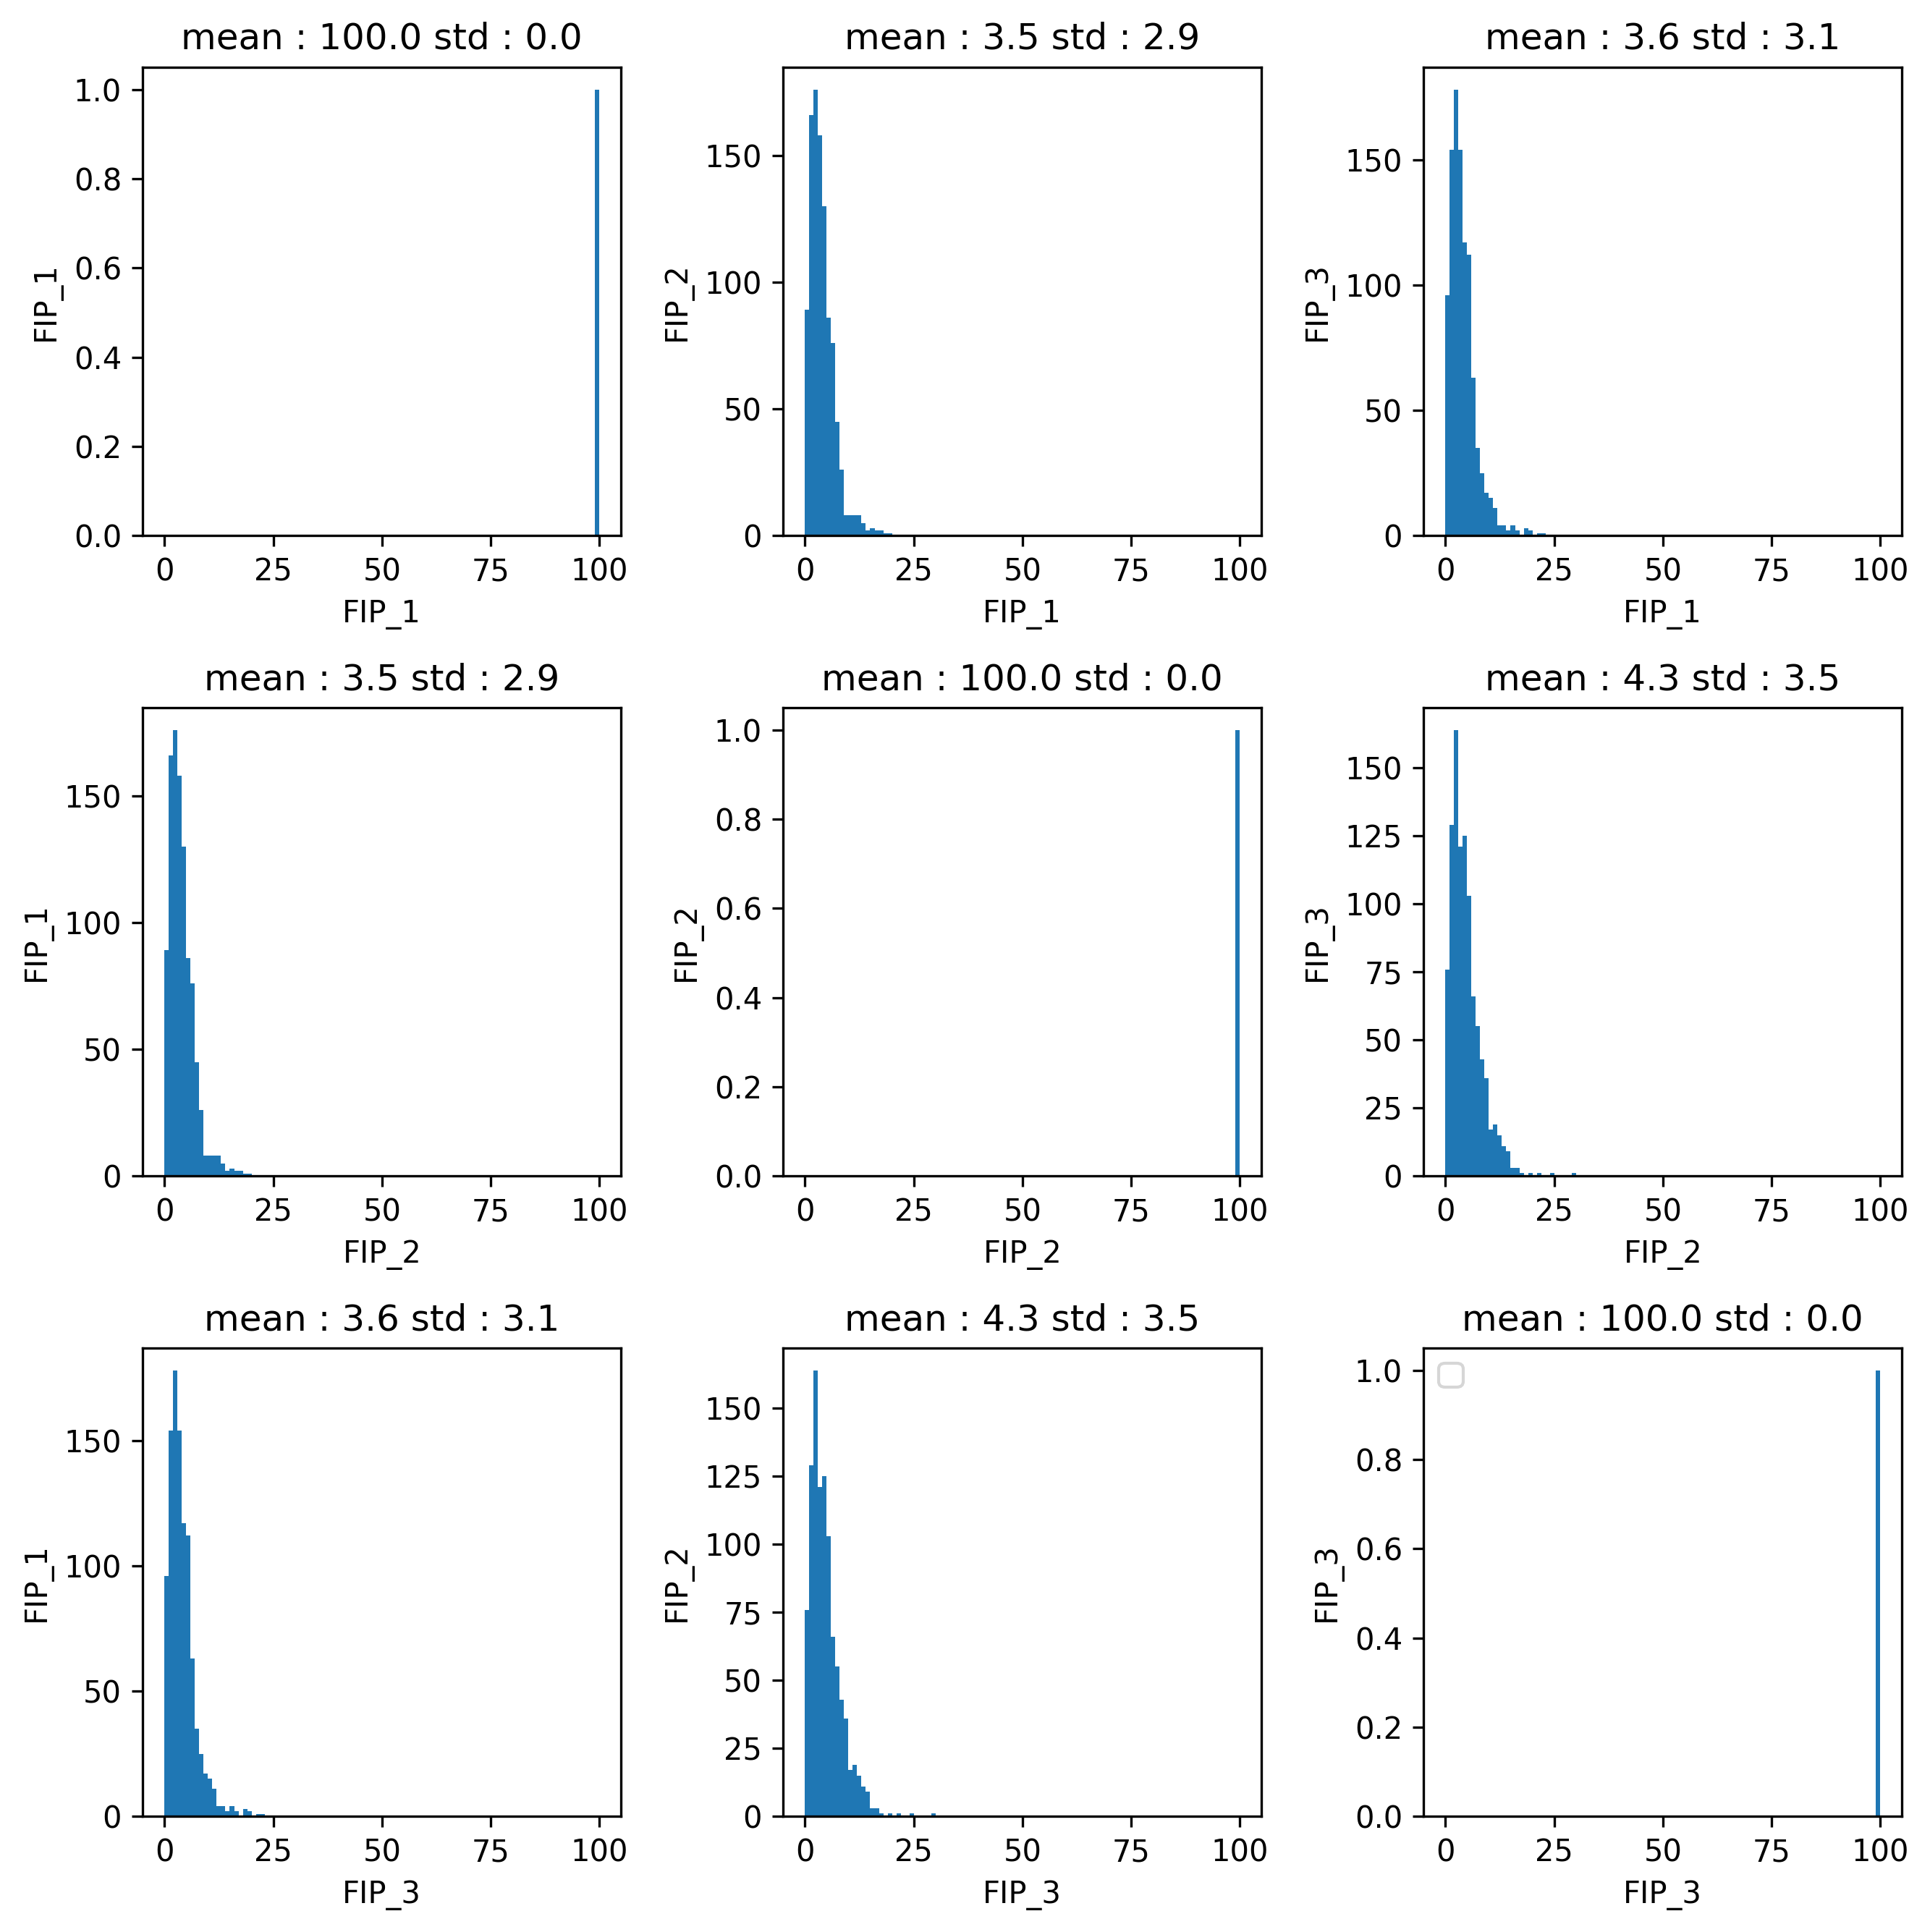

In [200]:
## plot
fig, axs = plt.subplots(nrows=len(intersections.keys()), ncols=len(intersections.keys()), figsize=(3*len(intersections.keys()),3*len(intersections.keys())), dpi=300)
for i, name1 in enumerate(names):
    for j, name2 in enumerate(names):
        intersection = intersections.loc[name1, name2]
        axs[i,j].hist(intersection, bins=range(0, nb_neigh+1))
        axs[i,j].set_xlabel(name1)
        axs[i,j].set_ylabel(name2)
        axs[i,j].set_title(f'mean : {np.mean(intersection):.1f} std : {np.std(intersection):.1f}')
plt.legend()
plt.tight_layout()
plt.show()

# COMPARISON TO MORPHOMETRY

In [5]:
mods = {'B-VAE': [],
        'SimCLR': [],
        'morpho all': [],
        'morpho shape': [],
        'morpho pos': []}

sulci = ['S.T.s', 'CINGULATE']
sides = ['left', 'right']

models = {sulcus+'_'+side: mods for sulcus in sulci for side in sides}

In [52]:
# select morpho rows based on info dHCP and simple morpho to get measures corresponding to right sessions
# done only once to define the indexes to keep
info_dHCP = pd.read_csv('/neurospin/dico/jlaval/data/info_dHCP.csv')
sulcus = 'S.T.s._right'
morpho_params = ['hull_junction_length_talairach', 'maxdepth_talairach', 'GM_thickness', 'opening', 'meandepth_talairach', 'surface_talairach']
morpho_df = pd.DataFrame(columns=morpho_params)

for idx, (id, session, _, _) in info_dHCP.iterrows():
    morpho_dir = f'/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_morpho_bids/sub-{id}/ses-{session}/anat/t1mri/default_acquisition/default_analysis/folds/3.1/default_session_auto/{id}_default_session_auto_sulcal_morphometry.csv'
    morpho = pd.read_csv(morpho_dir, sep=';')
    morpho_sulcus = morpho.loc[morpho['sulcus']==sulcus][morpho_params]
    morpho_df = morpho_df.append(morpho_sulcus)

df_morpho = pd.concat([info_dHCP, morpho_df.set_index(info_dHCP.index)], axis=1)

for idx, row in morpho.iterrows():
    if df_morpho.loc[df_morpho['participant_id']==row['subject']].shape[0]==0:
        morpho.drop(idx, inplace=True)
    elif row['hullJunctionsLength'] != df_morpho.loc[df_morpho['participant_id']==row['subject']].hull_junction_length_talairach.tolist()[0]:
        morpho.drop(idx, inplace=True)

index_to_keep = morpho.index.tolist()

KeyError: 'subject'

In [54]:
# compute and return 3 dfs
def format_morpho(df):

    length = df['hullJunctionsLength'].to_numpy()
    extremity1 = df[['extremity1x', 'extremity1y', 'extremity1z']].to_numpy()
    extremity2 = df[['extremity2x', 'extremity2y', 'extremity2z']].to_numpy()
    coords = extremity1-extremity2
    d = np.sqrt(np.square(coords[:,0]) + np.square(coords[:,1]) + np.square(coords[:,2]))

    foldness = (length - d) / length

    df['SulcusLength']=d # probably not used ?
    df['foldness']=foldness

    # first positional measures
    posi_params = ['gravityCenter_x', 'gravityCenter_y', 'gravityCenter_z',
                'normal_x', 'normal_y', 'normal_z',
                'direction_x', 'direction_y', 'direction_z']

    cols = [f'dim{k}' for k in range(1,len(posi_params)+1)]
    embeddings_pos = df[['subject']+posi_params]
    embeddings_pos.columns=['ID']+cols

    shape_params = ['surface', 'geodesicDepthMax', 'geodesicDepthMean', 'hullJunctionsLength',
                'connectedComponentsAllRels', 'connectedComponents', 'foldness']


    cols = [f'dim{k}' for k in range(1,len(shape_params)+1)]

    embeddings_shape = df[['subject']+shape_params]
    embeddings_shape.columns=['ID']+cols

    all_params = posi_params + shape_params

    cols = [f'dim{k}' for k in range(1,len(all_params)+1)]

    embeddings_all = df[['subject']+all_params]
    embeddings_all.to_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/crops/2mm/S.T.s.baby/mask/morpho_labels.csv', index=False)
    embeddings_all.columns=['ID']+cols

    return(embeddings_all, embeddings_shape, embeddings_pos)

In [60]:
# load embeddings of each model
sulci = ['S.T.s'] # temporary...
sides = ['right']

#S.T.s_left
models['S.T.s_right']['B-VAE'] = pd.read_csv('/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/2023-12-11/14-10-52/analysis/embeddings_dHCP.csv')
models['S.T.s_right']['SimCLR'] = pd.read_csv('/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/full_embeddings.csv')

# morpho
for sulcus in sulci:
    for side in sides:
        morpho = pd.read_csv(f'/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/morphometry/morphometry_statistics/right/morpho_{sulcus}._{side}.dat', sep=' ')
        morpho = morpho.loc[index_to_keep]
        morphos = format_morpho(morpho)
        models[f'{sulcus}_{side}']['morpho all'], models[f'{sulcus}_{side}']['morpho shape'], models[f'{sulcus}_{side}']['morpho pos'] = morphos[0], morphos[1], morphos[2]

In [122]:
def dist_embeddings(df1, df2, dist1='euclidean', dist2='euclidean', nb_neigh=-1):

    """
    Returns disymilarity between two embeddings using rank test on pairwise distances
    """

    # then select all subjects
    if nb_neigh == -1:
        nb_neigh = df1.shape[0]-1

    model1 = df1.drop('ID', axis=1).to_numpy()
    model2 = df2.drop('ID', axis=1).to_numpy()

    model1 = scaler.fit_transform(model1)
    model2 = scaler.fit_transform(model2)

    selected_dists_1 = []
    selected_dists_2 = []
    
    if dist1=='euclidean':
        pairwise_dists_1 = euclidean_distances(model1)
    elif dist1=='cosine':
        pairwise_dists_1 = cosine_similarity(model1)
    if dist2=='euclidean':
        pairwise_dists_2 = euclidean_distances(model2)
    elif dist2=='cosine':
        pairwise_dists_2 = cosine_similarity(model2)

    for dists_1, dists_2 in zip(pairwise_dists_1, pairwise_dists_2):
        dists_1 = np.delete(dists_1, 0) #remove distance to itself
        dists_2 = np.delete(dists_2, 0)
        idxs=np.argsort(dists_1) #get closest subjects for model1
        selected_dists_1=selected_dists_1+dists_1[idxs[:nb_neigh]].tolist()
        selected_dists_2=selected_dists_2+dists_2[idxs[:nb_neigh]].tolist() #apply same subject selection to model2
    print(selected_dists_1)
    tau, p = scipy.stats.kendalltau(selected_dists_1, selected_dists_2)
    
    return(tau, p)

In [18]:
# y a-t-il des nans ? Récupérer les index pour supprimer les sujets avant de faire les calculs de distances pairwise...

In [228]:
df1 = models['S.T.s_right']['SimCLR']
df2 = models['S.T.s_right']['morpho all']
dist1='euclidean'
dist2='euclidean'
nb_neigh=-1

# then select all subjects
if nb_neigh == -1:
    nb_neigh = df1.shape[0]-1

model1 = df1.drop('ID', axis=1).to_numpy()
model2 = df2.drop('ID', axis=1).to_numpy()

model1 = scaler.fit_transform(model1)
model2 = scaler.fit_transform(model2)

selected_dists_1 = []
selected_dists_2 = []

if dist1=='euclidean':
    pairwise_dists_1 = euclidean_distances(model1)
elif dist1=='cosine':
    pairwise_dists_1 = cosine_similarity(model1)
if dist2=='euclidean':
    pairwise_dists_2 = euclidean_distances(model2)
elif dist2=='cosine':
    pairwise_dists_2 = cosine_similarity(model2)

for idx, (dists_1, dists_2) in enumerate(zip(pairwise_dists_1, pairwise_dists_2)):
    dists_1 = np.delete(dists_1, idx) #remove distance to itself
    dists_2 = np.delete(dists_2, idx)
    idxs=np.argsort(dists_1) #get closest subjects for model1
    selected_dists_1=selected_dists_1+dists_1[idxs[:nb_neigh]].tolist()
    selected_dists_2=selected_dists_2+dists_2[idxs[:nb_neigh]].tolist() #apply same subject selection to model2
tau, p = scipy.stats.kendalltau(selected_dists_1, selected_dists_2)
print(tau)